## PCA visualization on multiple datasets

1. COIL-20 dataset

In [32]:
# import libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [33]:
def parse_image_label(filename):
    f = filename.split('_')[0]
    f = f.replace('obj', '')
    return int(f)

images.shape: (1440, 128, 128, 3)
labels.shape: (1440,)


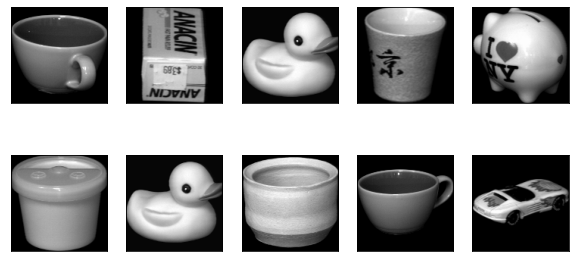

In [34]:
# import coil-20 dataset
data_path = './coil-20/coil-20-proc/'

images = []
labels = []

for filepath in os.listdir(data_path):
    f = os.path.join(data_path, filepath)
    img = cv2.imread(f)
    images.append(img)
    labels.append(parse_image_label(filepath))

images = np.array(images)
labels = np.array(labels)
print(f"images.shape: {images.shape}")
print(f"labels.shape: {labels.shape}")
random_indices = np.random.randint(0, images.shape[0], 10)
random_images = images[random_indices]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(random_images[i], cmap='gray')
    ax.set(xticks=[], yticks=[])
plt.show()



In [35]:
# run pca on the dataset

# flatten the images
images_flat = images.reshape(images.shape[0], -1)

# run pca
pca = PCA(n_components=2)
pca.fit(images_flat)
images_pca = pca.transform(images_flat)

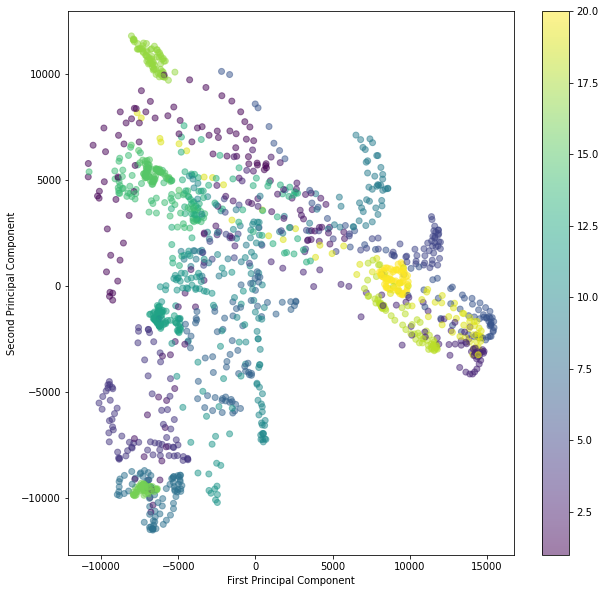

In [36]:
# plot the results
plt.figure(figsize=(10, 10))
plt.scatter(images_pca[:, 0], images_pca[:, 1], alpha=0.5,c=labels)
plt.colorbar()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()